In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from sklearn.utils import shuffle
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/goura/Desktop/Loan_Default_Classification/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv")

C:\Users\goura\AppData\Local\Temp\ipykernel_20416\2255243340.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/goura/Desktop/Loan_Default_Classification/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [4]:
columns_to_drop = ['id', 'member_id', 'url', 'desc', 'title', 'zip_code', 'pymnt_plan', 
                   'next_pymnt_d', 'initial_list_status', 'policy_code', 'mths_since_last_record', 
                   'mths_since_last_delinq', 'mths_since_last_major_derog', 'last_fico_range_low', 
                   'last_fico_range_high', 'hardship_flag', 'hardship_type', 'hardship_reason', 
                   'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 
                   'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 
                   'hardship_loan_status', 'orig_projected_additional_accrued_interest', 
                   'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'disbursement_method', 
                   'debt_settlement_flag', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 
                   'settlement_amount', 'settlement_percentage', 'settlement_term']
df_cleaned = df.drop(columns=columns_to_drop)

In [5]:
drop_null_column = ['funded_amnt_inv', 'total_bal_il', 'emp_title', 'issue_d', 'addr_state', 'out_prncp_inv', 'total_pymnt_inv', 'total_rec_late_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'sec_app_mths_since_last_major_derog',  'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'sec_app_collections_12_mths_ex_med', 'sec_app_chargeoff_within_12_mths', 'sec_app_num_rev_accts', 'sec_app_open_act_il', 'sec_app_revol_util', 'sec_app_open_acc', 'sec_app_mort_acc', 'sec_app_inq_last_6mths', 'sec_app_earliest_cr_line', 'sec_app_fico_range_high', 'sec_app_fico_range_low', 'revol_bal_joint', 'mths_since_rcnt_il', 'il_util', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq']
cleaned = df_cleaned.drop(columns=drop_null_column)

In [6]:
low_missing_columns = [
    'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 
    'home_ownership', 'annual_inc', 'verification_status', 'loan_status', 
    'fico_range_low', 'fico_range_high', 'revol_bal', 'out_prncp', 'total_pymnt', 
    'total_rec_prncp', 'total_rec_int', 'recoveries', 'collection_recovery_fee', 'application_type', 'delinq_2yrs', 'open_acc', 'inq_last_6mths', 'pub_rec', 'total_acc', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tax_liens'
]
df_cleaned = cleaned.dropna(subset=low_missing_columns)

In [7]:
df_cleaned['dti'] = df_cleaned['dti'].fillna(df_cleaned['dti'].median())
df_cleaned['revol_util'] = df_cleaned['revol_util'].fillna(df_cleaned['revol_util'].median())
df_cleaned['pub_rec_bankruptcies'] = df_cleaned['pub_rec_bankruptcies'].fillna(df_cleaned['pub_rec_bankruptcies'].median())
df_cleaned['tot_coll_amt'] = df_cleaned['tot_coll_amt'].fillna(df_cleaned['tot_coll_amt'].median())
df_cleaned['tot_cur_bal'] = df_cleaned['tot_cur_bal'].fillna(df_cleaned['tot_cur_bal'].median())
df_cleaned['total_rev_hi_lim'] = df_cleaned['total_rev_hi_lim'].fillna(df_cleaned['total_rev_hi_lim'].median())
df_cleaned['num_tl_op_past_12m'] = df_cleaned['num_tl_op_past_12m'].fillna(df_cleaned['num_tl_op_past_12m'].median())
df_cleaned['pct_tl_nvr_dlq'] = df_cleaned['pct_tl_nvr_dlq'].fillna(df_cleaned['pct_tl_nvr_dlq'].median())
df_cleaned['emp_length'] = df_cleaned['emp_length'].fillna(df_cleaned['emp_length'].mode())
df_cleaned['emp_length'].fillna(df_cleaned['emp_length'].mode()[0], inplace=True)

C:\Users\goura\AppData\Local\Temp\ipykernel_20416\4155799956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['dti'] = df_cleaned['dti'].fillna(df_cleaned['dti'].median())
C:\Users\goura\AppData\Local\Temp\ipykernel_20416\4155799956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['revol_util'] = df_cleaned['revol_util'].fillna(df_cleaned['revol_util'].median())
C:\Users\goura\AppData\Local\Temp\ipykernel_20416\4155799956.py:3: SettingWithCopyWarning: 
A value is trying to be set

In [8]:
emp_length_mapping = {
    '< 1 year': 0.5,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}
df_cleaned['emp_length'] = df_cleaned['emp_length'].map(emp_length_mapping)
df_cleaned['emp_length'].fillna(df_cleaned['emp_length'].median(), inplace=True)

C:\Users\goura\AppData\Local\Temp\ipykernel_20416\1118833201.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['emp_length'] = df_cleaned['emp_length'].map(emp_length_mapping)
C:\Users\goura\AppData\Local\Temp\ipykernel_20416\1118833201.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the origi

In [9]:
home_ownership_mapping = {
    'MORTGAGE':0,
    'RENT':1,
    'OWN':2,
    'OTHER':3,
    'ANY':4,
    'NONE':5
}
df_cleaned['home_ownership'] = df_cleaned['home_ownership'].map(home_ownership_mapping)
# df_cleaned['home_ownership'] = df_cleaned['home_ownership'].fillna(df_cleaned['home_ownership'].mode())

C:\Users\goura\AppData\Local\Temp\ipykernel_20416\3905933245.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['home_ownership'] = df_cleaned['home_ownership'].map(home_ownership_mapping)


In [10]:
df_cleaned['home_ownership']

0          0
1          0
2          0
3          0
4          0
          ..
2260694    0
2260695    0
2260696    0
2260697    1
2260698    0
Name: home_ownership, Length: 2260522, dtype: int64

In [11]:
verification_status_mapping = {
    'Not Verified':0,
    'Source Verified':1,
    'Verified':2
}
df_cleaned['verification_status'] = df_cleaned['verification_status'].map(verification_status_mapping)

C:\Users\goura\AppData\Local\Temp\ipykernel_20416\49829525.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['verification_status'] = df_cleaned['verification_status'].map(verification_status_mapping)


In [12]:
loan_status_mapping = {
    'Fully Paid': 0,
    'Current': 0,
    'Charged Off': 1,
    'In Grace Period': 1,
    'Late (31-120 days)': 1,
    'Late (16-30 days)': 1,
    'Default': 1,
    'Does not meet the credit policy. Status:Fully Paid': 0,
    'Does not meet the credit policy. Status:Charged Off': 1
}
df_cleaned['loan_status'] = df_cleaned['loan_status'].map(loan_status_mapping)

C:\Users\goura\AppData\Local\Temp\ipykernel_20416\867387072.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['loan_status'] = df_cleaned['loan_status'].map(loan_status_mapping)


In [13]:
application_type_mapping = {
    'Individual':0,
    'Joint App':1
}
df_cleaned['application_type'] = df_cleaned['application_type'].map(application_type_mapping)

C:\Users\goura\AppData\Local\Temp\ipykernel_20416\2094341301.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['application_type'] = df_cleaned['application_type'].map(application_type_mapping)


In [14]:
df_cleaned['term'] = df_cleaned['term'].str.strip()
term_mapping = {
    '60 months':0,
    '36 months':1
}
df_cleaned['term'] = df_cleaned['term'].map(term_mapping)

C:\Users\goura\AppData\Local\Temp\ipykernel_20416\1804118674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['term'] = df_cleaned['term'].str.strip()
C:\Users\goura\AppData\Local\Temp\ipykernel_20416\1804118674.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['term'] = df_cleaned['term'].map(term_mapping)


In [15]:
purpose_mapping = {
    'debt_consolidation': 0,
    'small_business': 1,
    'home_improvement': 2,
    'major_purchase': 3,
    'credit_card': 4,
    'other': 5,
    'house': 6,
    'vacation': 7,
    'car': 8,
    'medical': 9,
    'moving': 10,
    'renewable_energy': 11,
    'wedding': 12,
    'educational': 13
}
df_cleaned['purpose'] = df_cleaned['purpose'].map(purpose_mapping)

C:\Users\goura\AppData\Local\Temp\ipykernel_20416\313361140.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['purpose'] = df_cleaned['purpose'].map(purpose_mapping)


In [16]:
# A>B>C>D>E>F
grade_mapping = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6
}
df_cleaned['grade'] = df_cleaned['grade'].map(grade_mapping)

C:\Users\goura\AppData\Local\Temp\ipykernel_20416\1855757074.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['grade'] = df_cleaned['grade'].map(grade_mapping)


In [17]:
sub_grade_order = ['A1', 'A2', 'A3', 'A4', 'A5', 
                   'B1', 'B2', 'B3', 'B4', 'B5', 
                   'C1', 'C2', 'C3', 'C4', 'C5', 
                   'D1', 'D2', 'D3', 'D4', 'D5', 
                   'E1', 'E2', 'E3', 'E4', 'E5', 
                   'F1', 'F2', 'F3', 'F4', 'F5', 
                   'G1', 'G2', 'G3', 'G4', 'G5']
sub_grade_mapping = {sub_grade: i for i, sub_grade in enumerate(sub_grade_order)}
df_cleaned['sub_grade'] = df_cleaned['sub_grade'].map(sub_grade_mapping)

C:\Users\goura\AppData\Local\Temp\ipykernel_20416\4121050966.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['sub_grade'] = df_cleaned['sub_grade'].map(sub_grade_mapping)


In [18]:
df_cleaned['earliest_cr_line'] = pd.to_datetime(df_cleaned['earliest_cr_line'], errors='coerce')
df_cleaned['credit_history_length'] = datetime.now().year - df_cleaned['earliest_cr_line'].dt.year

C:\Users\goura\AppData\Local\Temp\ipykernel_20416\4136854587.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['earliest_cr_line'] = pd.to_datetime(df_cleaned['earliest_cr_line'], errors='coerce')
C:\Users\goura\AppData\Local\Temp\ipykernel_20416\4136854587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['earliest_cr_line'] = pd.to_datetime(df_cleaned['earliest_cr_line'], errors='coerce')
C:\Users\goura\AppData\Local\Temp\ipykernel_20416\4136854587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [19]:
if 'earliest_cr_line' in df_cleaned.columns:
    # Convert 'earliest_cr_line' to the number of years since the earliest credit line
    df_cleaned['credit_history_length'] = (pd.to_datetime('today') - pd.to_datetime(df_cleaned['earliest_cr_line'])).dt.days / 365
    # Now drop the original 'earliest_cr_line' column since we have derived a numeric feature from it
    df_cleaned = df_cleaned.drop(columns=['earliest_cr_line'])

C:\Users\goura\AppData\Local\Temp\ipykernel_20416\2400239070.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['credit_history_length'] = (pd.to_datetime('today') - pd.to_datetime(df_cleaned['earliest_cr_line'])).dt.days / 365


In [20]:
data=df_cleaned.sample(frac=.5,random_state=101)

<Axes: xlabel='loan_status', ylabel='count'>

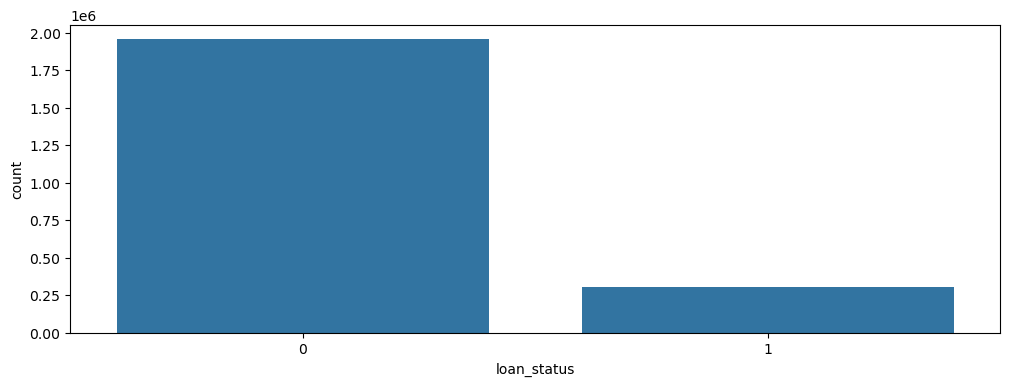

In [21]:
plt.figure(figsize=(12, 4))
sns.countplot(x="loan_status",data=df_cleaned)

C:\Users\goura\AppData\Local\Temp\ipykernel_20416\3044012447.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned["loan_amnt"],kde=False,bins=40)


<Axes: xlabel='loan_amnt'>

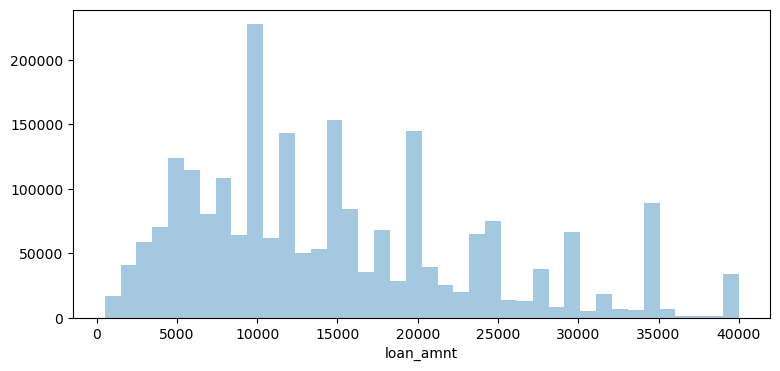

In [22]:
plt.figure(figsize=(9,4))
sns.distplot(df_cleaned["loan_amnt"],kde=False,bins=40)

<Axes: >

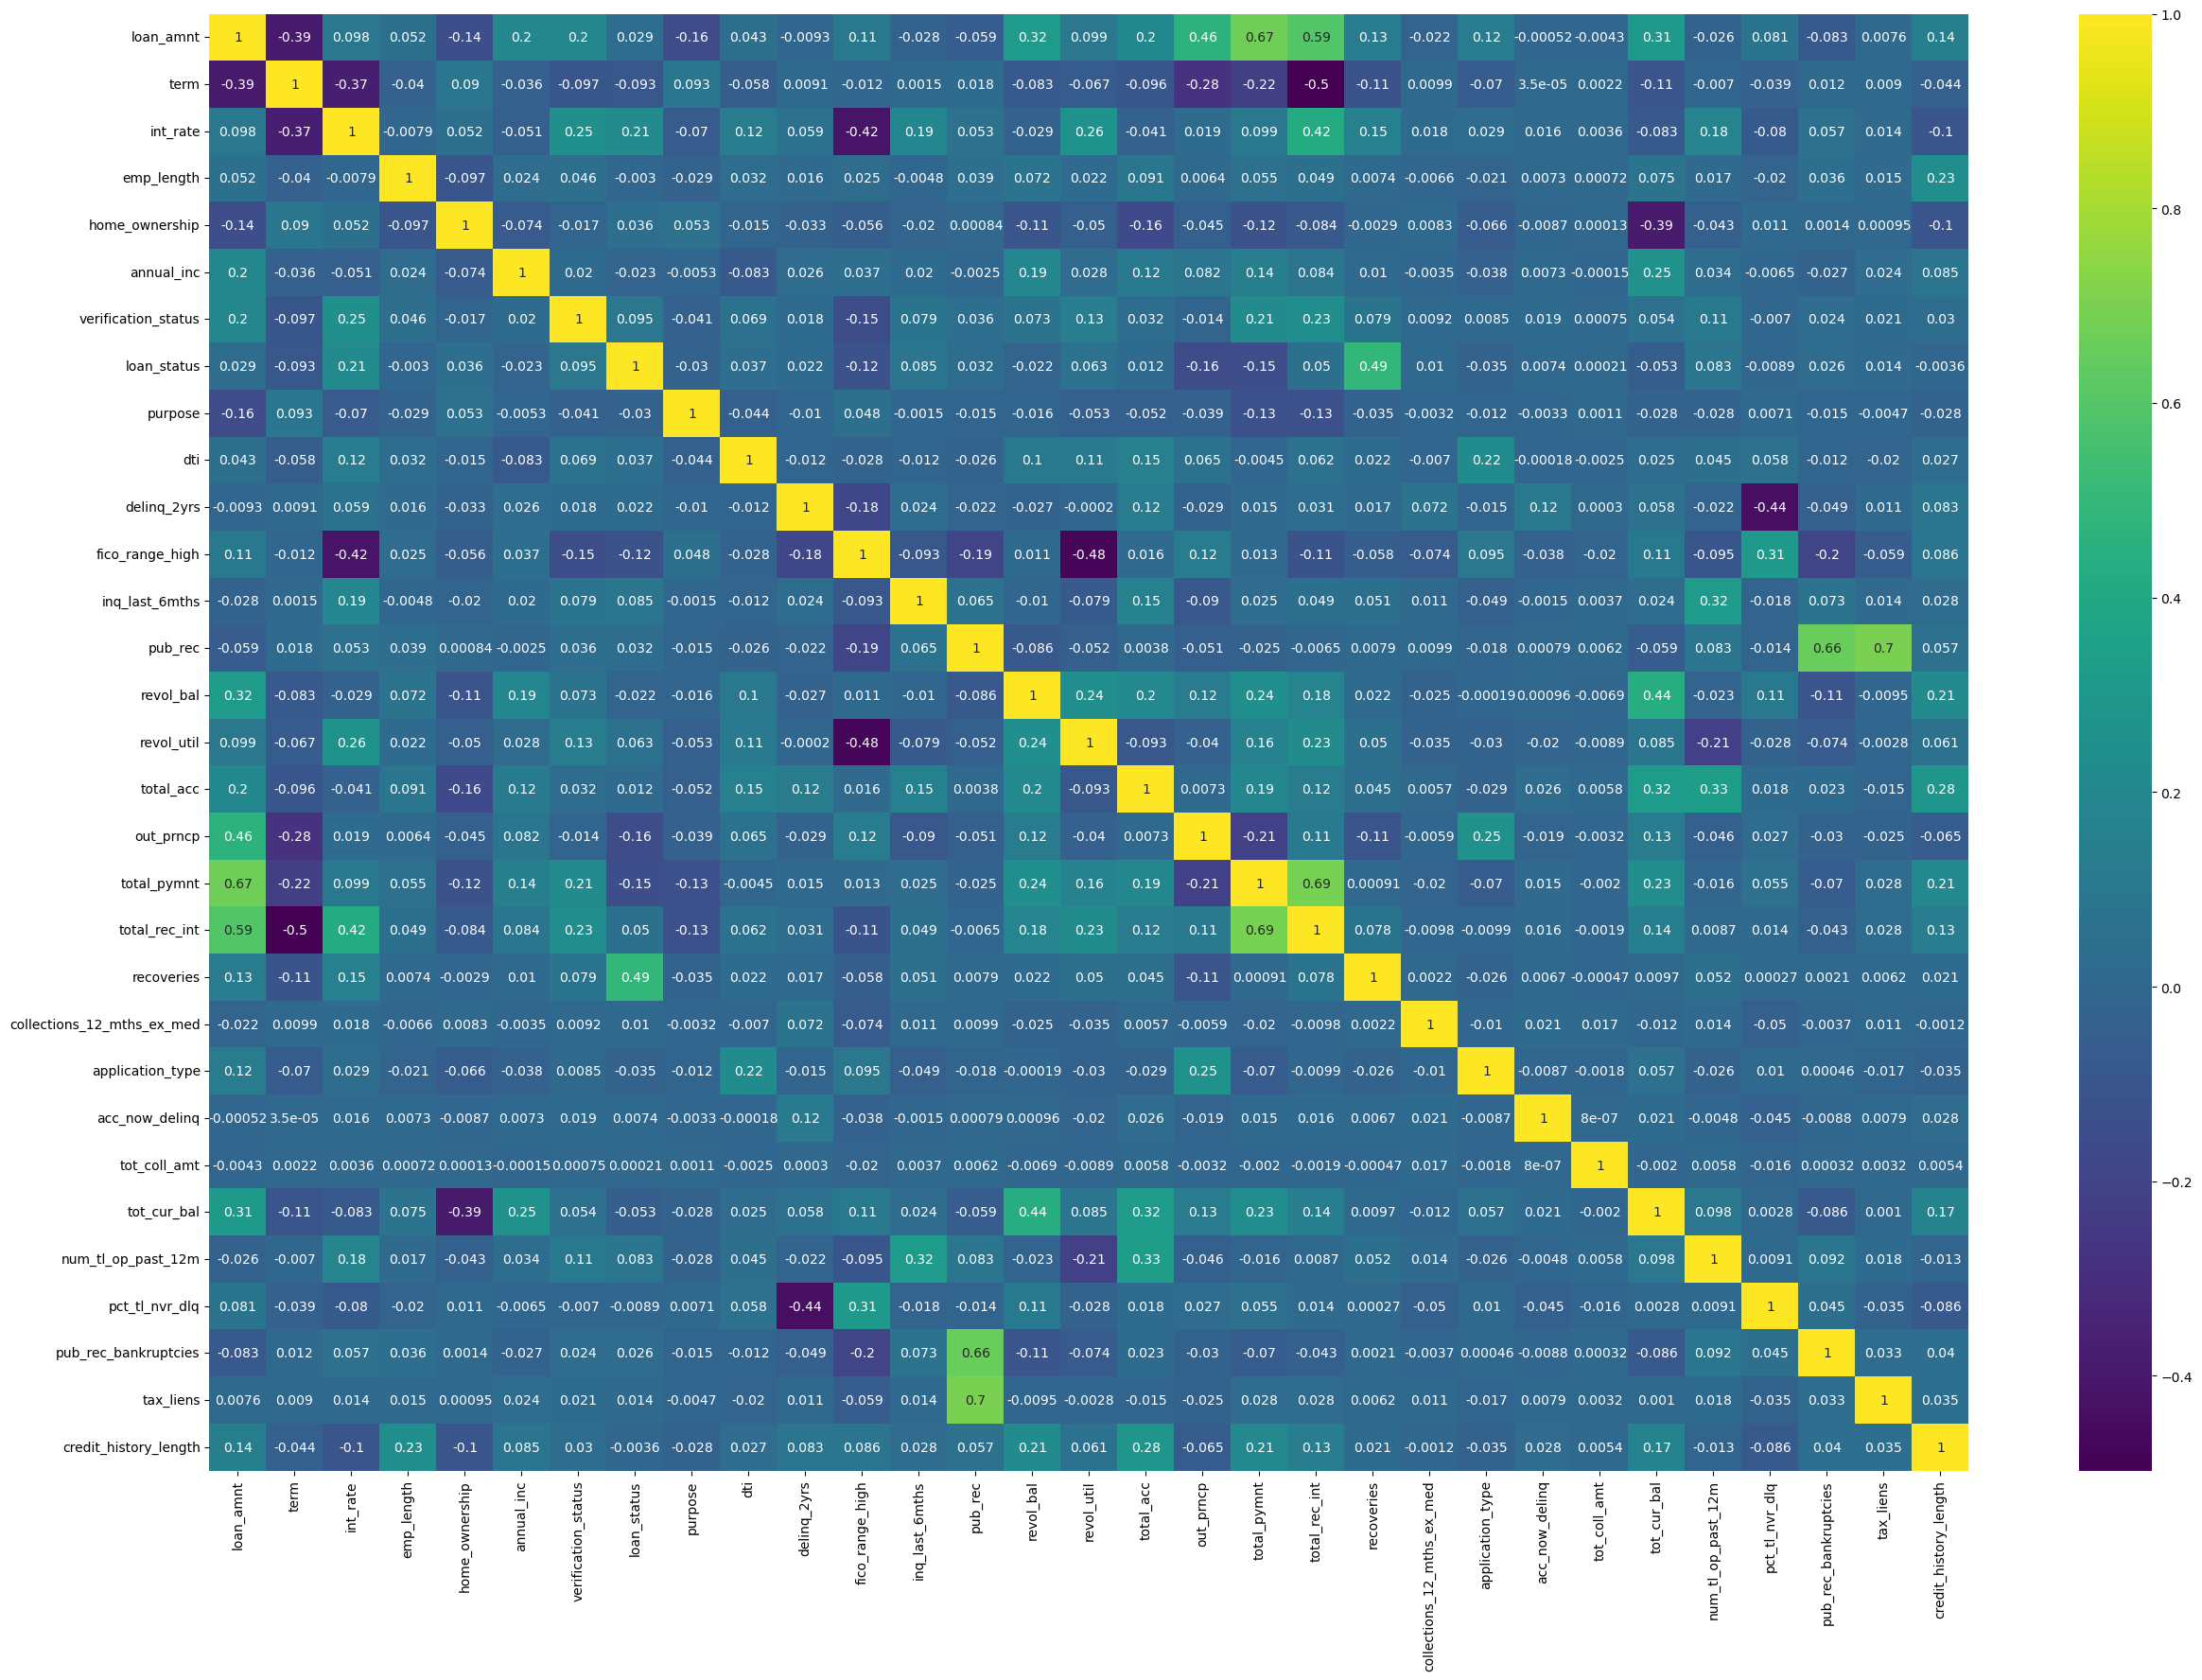

In [30]:
plt.figure(figsize=(30,20))
sns.heatmap(df_cleaned.corr(),annot=True,cmap="viridis")

In [24]:
import numpy as np

# Create a correlation matrix
corr_matrix = df_cleaned.corr().abs()

# Identify pairs with high correlation (above 0.8)
high_corr_pairs = np.where(corr_matrix > 0.7)
high_corr_pairs = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_pairs) if x != y and x < y]

print("Highly correlated pairs:", high_corr_pairs)


Highly correlated pairs: [('loan_amnt', 'funded_amnt'), ('loan_amnt', 'installment'), ('funded_amnt', 'installment'), ('int_rate', 'grade'), ('int_rate', 'sub_grade'), ('grade', 'sub_grade'), ('fico_range_low', 'fico_range_high'), ('open_acc', 'total_acc'), ('revol_bal', 'total_rev_hi_lim'), ('total_pymnt', 'total_rec_prncp'), ('recoveries', 'collection_recovery_fee')]


In [25]:
# Dropping selected features
df_cleaned = df_cleaned.drop(columns=['funded_amnt', 'installment', 'grade', 'sub_grade', 'fico_range_low', 'total_rec_prncp', 'collection_recovery_fee','open_acc', 'total_rev_hi_lim'])

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

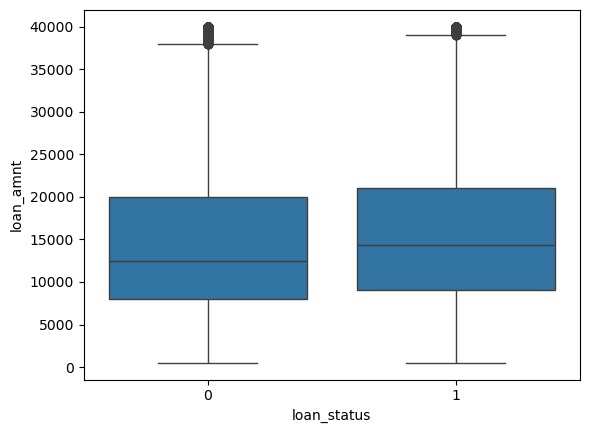

In [27]:
sns.boxplot(x="loan_status",y="loan_amnt",data=df_cleaned)

In [28]:
df_cleaned.groupby("loan_status")["loan_amnt"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,1956938.0,14941.192567,9224.130314,500.0,8000.0,12500.0,20000.0,40000.0
1,303584.0,15732.788536,8937.892541,500.0,9000.0,14400.0,21000.0,40000.0


<Axes: >

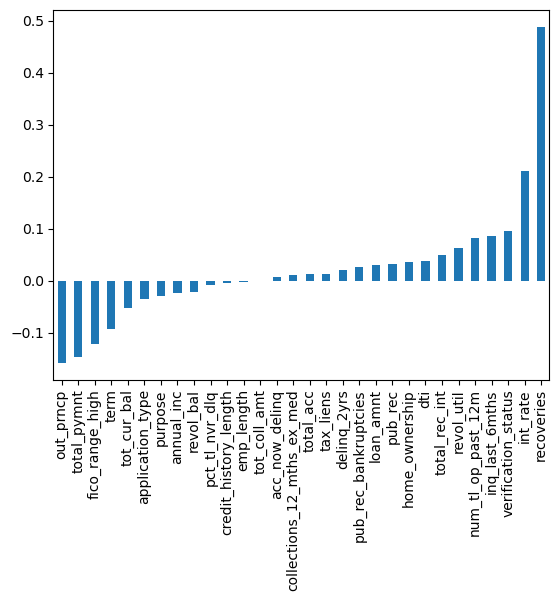

In [31]:
df_cleaned.corr()["loan_status"].sort_values().drop("loan_status").plot(kind="bar")

<Axes: xlabel='verification_status', ylabel='count'>

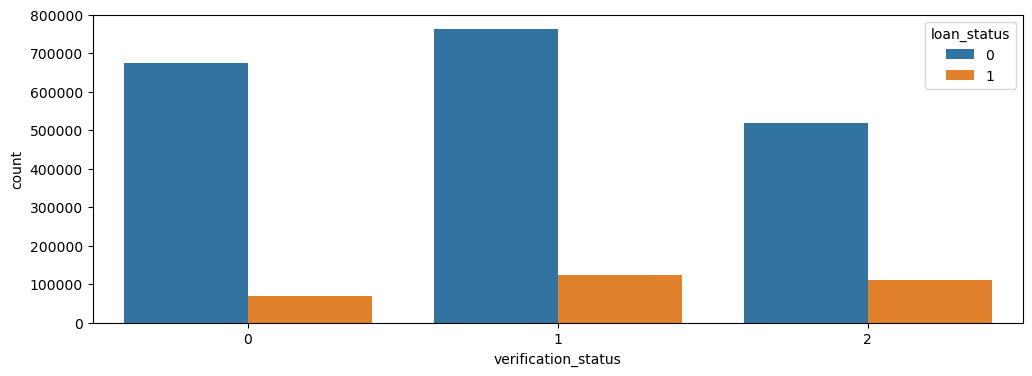

In [32]:
plt.figure(figsize=(12,4))
sns.countplot(x="verification_status",data=df_cleaned,hue="loan_status")

In [62]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame
# Separate the feature set (X) and the target/label (y)
X = df_cleaned.drop(columns=['loan_status'])  # Drop 'loan_status' from the feature set
y = df_cleaned['loan_status']  # 'loan_status' as the target

# Perform train-test split (80% train, 20% test by default)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1582365, 30)
X_test shape: (678157, 30)
y_train shape: (1582365,)
y_test shape: (678157,)


In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)
from tensorflow.keras.callbacks import EarlyStopping

In [65]:
# #running model
# #creating model 
# model = Sequential()

# #adding layer
# model.add(Dense(78,activation="relu"))
# model.add(Dropout(0.2))

# model.add(Dense(39,activation="relu"))
# model.add(Dropout(0.2))

# model.add(Dense(19,activation="relu"))
# model.add(Dropout(0.2))

# model.add(Dense(19,activation="relu"))
# model.add(Dropout(0.2))

# model.add(Dense(units=1,activation="sigmoid"))

# model.compile(loss="binary_crossentropy",optimizer="adam")

# #parameters for early stopping
# early_stop=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=5)

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Optimized Model
model = Sequential()

# Input Layer
model.add(Dense(64, activation="relu", input_dim=X_train.shape[1]))  # Adjust input_dim dynamically
model.add(Dropout(0.3))  # Increase dropout for better regularization

# Hidden Layers
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(16, activation="relu"))
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(units=1, activation="sigmoid"))  # Output for binary classification

# Compile the Model
model.compile(
    loss="binary_crossentropy",  # Suitable for binary classification
    optimizer="adam",  # Adam optimizer with learning rate scheduling
    metrics=["accuracy"]  # Add accuracy to track during training
)

# Early Stopping Callback
early_stop = EarlyStopping(
    monitor="val_loss",  # Monitor validation loss
    mode="min",  # Stop when validation loss stops decreasing
    verbose=1,  # Print stopping details
    patience=10  # Increase patience for slightly more tolerance
)


C:\Users\goura\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [67]:
# model.fit(x=X_train_scaled,y=y_train,epochs=25,batch_size=128,validation_data=(X_test_scaled,y_test),callbacks=[early_stop])

In [69]:
history = model.fit(
    X_train_scaled, y_train, 
    epochs=100,  # Maximum epochs for training
    validation_data=(X_test_scaled, y_test),  # Evaluate on test data
    batch_size=32,  # Batch size for optimization
    callbacks=[early_stop],  # Apply early stopping
    verbose=1  # Display progress during training
)

Epoch 1/100
49449/49449 ━━━━━━━━━━━━━━━━━━━━ 112s 2ms/step - accuracy: 0.8727 - loss: 0.3749 - val_accuracy: 0.9812 - val_loss: 0.0821
Epoch 2/100
49449/49449 ━━━━━━━━━━━━━━━━━━━━ 144s 2ms/step - accuracy: 0.9801 - loss: 0.0926 - val_accuracy: 0.9821 - val_loss: 0.0739
Epoch 3/100
49449/49449 ━━━━━━━━━━━━━━━━━━━━ 115s 2ms/step - accuracy: 0.9803 - loss: 0.0819 - val_accuracy: 0.9832 - val_loss: 0.0695
Epoch 4/100
49449/49449 ━━━━━━━━━━━━━━━━━━━━ 114s 2ms/step - accuracy: 0.9803 - loss: 0.0811 - val_accuracy: 0.9816 - val_loss: 0.0750
Epoch 5/100
49449/49449 ━━━━━━━━━━━━━━━━━━━━ 121s 2ms/step - accuracy: 0.9801 - loss: 0.0813 - val_accuracy: 0.9827 - val_loss: 0.0702
Epoch 6/100
49449/49449 ━━━━━━━━━━━━━━━━━━━━ 114s 2ms/step - accuracy: 0.9806 - loss: 0.0797 - val_accuracy: 0.9829 - val_loss: 0.0731
Epoch 7/100
49449/49449 ━━━━━━━━━━━━━━━━━━━━ 114s 2ms/step - accuracy: 0.9809 - loss: 0.0787 - val_accuracy: 0.9832 - val_loss: 0.0697
Epoch 8/100
49449/49449 ━━━━━━━━━━━━━━━━━━━━ 114s 2ms/s

<Axes: >

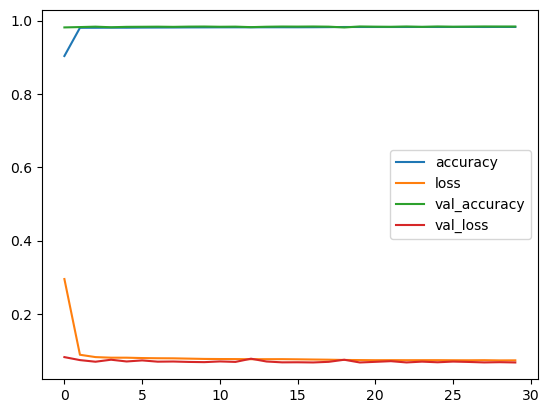

In [70]:
loss=pd.DataFrame(model.history.history)

loss.plot()

21193/21193 ━━━━━━━━━━━━━━━━━━━━ 26s 1ms/step
              precision    recall  f1-score   support

           0       0.88      1.00      0.94    587279
           1       1.00      0.12      0.21     90878

    accuracy                           0.88    678157
   macro avg       0.94      0.56      0.58    678157
weighted avg       0.90      0.88      0.84    678157

Confusion Matrix:
 [[587279      0]
 [ 80001  10877]]
AUC: 0.5598494685182333


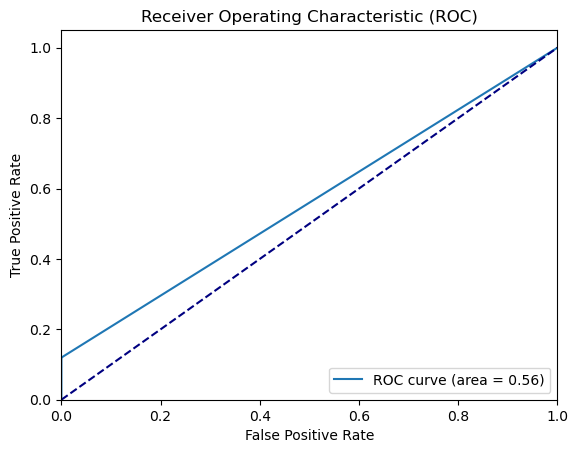

In [71]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, auc

# Assuming this is a binary classifier and predict() gives probabilities
predict_prob = model.predict(X_test)

# Convert probabilities to binary class labels (0 or 1) using threshold of 0.5
predict = (predict_prob >= 0.5).astype(int)

# Now pass the binary predictions to the classification metrics
print(classification_report(y_test, predict))
print("Confusion Matrix:\n", confusion_matrix(y_test, predict))

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, predict_prob)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# Optionally, plot the ROC curve
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
